#**Simple K-Means Clustering**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

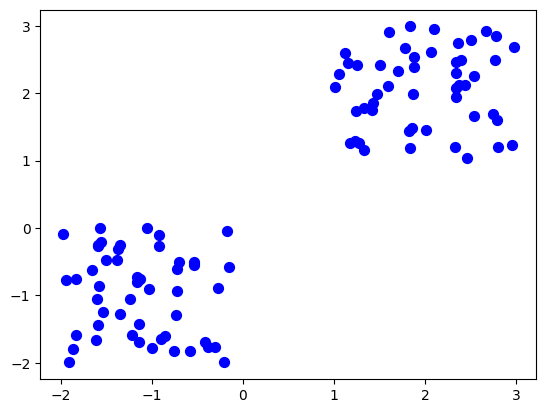

In [2]:
# Generate two clusters of random data points
X = -2 * np.random.rand(100, 2)  # First cluster (100 points)
X1 = 1 + 2 * np.random.rand(50, 2)  # Second cluster (50 points)
X[50:100, :] = X1  # Assign the second cluster to part of the data

# Visualize the initial data points
plt.scatter(X[:, 0], X[:, 1], s=50, c='b')
plt.show()

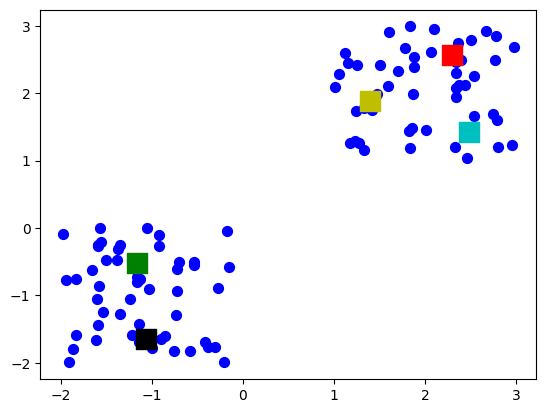

In [3]:
# KMeans clustering with 5 clusters
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)  # Fit the model to the data

# Get cluster centroids
cent = Kmean.cluster_centers_

# Visualize the data points and cluster centroids
plt.scatter(X[:, 0], X[:, 1], s=50, c='b')  # Data points
# Plotting centroids with different colors
plt.scatter(cent[0][0], cent[0][1], s=200, c='g', marker='s')
plt.scatter(cent[1][0], cent[1][1], s=200, c='r', marker='s')
plt.scatter(cent[2][0], cent[2][1], s=200, c='y', marker='s')
plt.scatter(cent[3][0], cent[3][1], s=200, c='c', marker='s')
plt.scatter(cent[4][0], cent[4][1], s=200, c='black', marker='s')
plt.show()

In [4]:
# Check the cluster labels assigned to the data points
Kmean.labels_

array([0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 0, 0, 0,
       4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4,
       4, 4, 0, 4, 0, 4, 1, 1, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1,
       2, 3, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 3, 1, 2, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2], dtype=int32)

In [5]:
# Example: Predicting the cluster for a new data point
sample_test = np.array([-3.0, -3.0])  # New data point
second_test = sample_test.reshape(1, -1)  # Reshape for compatibility
Kmean.predict(second_test)  # Predict the cluster

array([4], dtype=int32)

In [6]:
# Accessing and inspecting cluster centroids
C = Kmean.cluster_centers_
C[0][1]  # Accessing a specific value

-0.5201735355128156

#**Use Case**

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Live.csv to Live.csv


In [59]:
df = pd.read_csv('Live.csv')

In [60]:
df.shape

(7050, 16)

In [61]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [63]:
# Checking for missing values
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [64]:
# Dropping irrelevant columns (manual decision)
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [65]:
# Rechecking dataset structure after column removal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [66]:
# Statistical summary of the dataset
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [67]:
# Exploring unique values of specific columns
df['status_id'].unique()
len(df['status_id'].unique())  # Number of unique status_ids

6997

In [68]:
df['status_published'].unique()
len(df['status_published'].unique())  # Number of unique status_published values

6913

In [69]:
df['status_type'].unique()
len(df['status_type'].unique())  # Number of unique status_types

4

In [70]:
# Dropping more columns that are irrelevant for clustering
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [72]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [73]:
df['status_type']

,status_type
0,video
1,photo
2,video
3,photo
4,photo
...,...
7045,photo
7046,photo
7047,photo
7048,photo


In [74]:
# Encoding categorical labels (status_type) to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [75]:
# Encode 'status_type' column and update X and y
X = df
y = df['status_type']


X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [77]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [78]:
cols = X.columns

In [79]:
# Scaling features using MinMaxScaler to normalize the data
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[df.columns])  # Converting back to DataFrame

In [80]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [81]:
# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=0)  # Initialize with 2 clusters
kmeans.fit(X)  # Fit model to data

KMeans(n_clusters=2, random_state=0)

In [82]:
# Inspect cluster centers and inertia (sum of squared distances)
kmeans.cluster_centers_
kmeans.inertia_

237.7572640441955

In [83]:
# Predicting labels for each data point
labels = kmeans.labels_

# Evaluate how many samples were correctly clustered (basic accuracy)
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))

Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


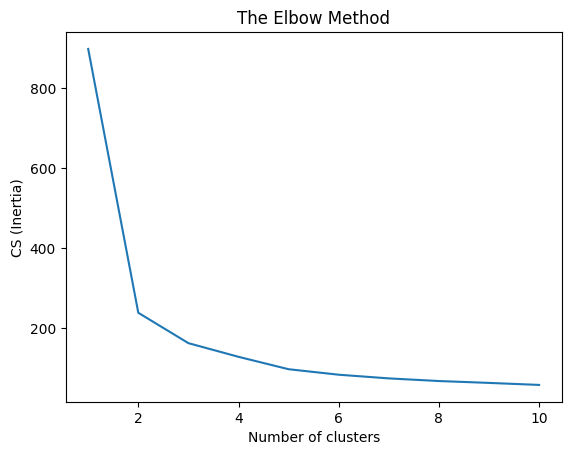

In [84]:
# Use the Elbow Method to determine the optimal number of clusters
cs = []
for i in range(1, 11):  # Trying cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)  # Append inertia for each k

# Plotting the Elbow plot
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS (Inertia)')
plt.show()

In [85]:
# # Repeat clustering with different numbers of clusters and evaluate accuracy
# for n_clusters in range(2, 5):  # Testing 2, 3, and 4 clusters
#     kmeans = KMeans(n_clusters=n_clusters, random_state=0)
#     kmeans.fit(X)
#     labels = kmeans.labels_  # Get cluster labels
#     correct_labels = sum(y == labels)  # Compare with true labels
#     print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
#     print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))

In [86]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


In [87]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4066 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


In [88]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4112 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


In [89]:
X

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [90]:
# Visualizing the clusters with the actual data
predict = pd.DataFrame(labels, columns=['label'])
predict['label'].unique()

array([2, 1, 0, 3], dtype=int32)

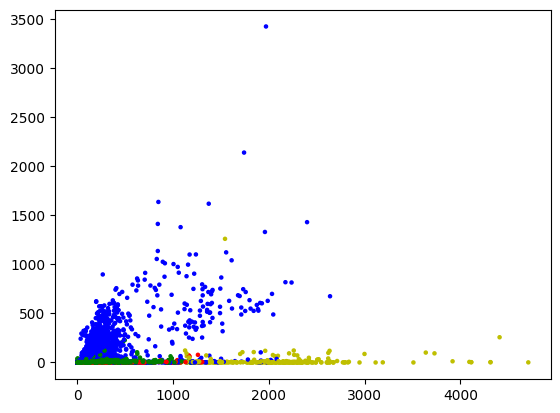

In [91]:
# Scatter plot showing the clusters
categories = np.array(labels)
colormap = np.array(['r', 'g', 'b', 'y'])
plt.scatter(df['num_reactions'], df['num_shares'], s=5, c=colormap[labels])